# Observed Trends

- Temperature goes higher as we approach the equator. 
- The distribution of the temperatures vs. latitude is not even. The temperature on positive latitude is higher compare to the one on negative latitude.
- No particular relationship between latitude and humidity, cloudiness, or wind speed.

In [69]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import random

#config
from config import api_key

Your objective is to build a series of scatter plots to showcase the following relationships:


- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude


Your final notebook must:


- Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
- Perform a weather check on each of the cities using a series of successive API calls. 
- Include a print log of each city as it's being processed with the city number, city name, and requested URL.
- Save both a CSV of all data retrieved and png images for each scatter plot.

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Random longtitude and sample 500 latitude

In [37]:
# Create a list for each parameter

lati = []
longti = []
cities = []
temp = []
cloud = []
humid = []
wind = []

In [38]:
# random latitude and longtitude

for x in range(500):
    # Longitude values range from -180° to 180°.
    longti.append(random.randint(-180, 180))
    
    # Latitude values range from -90° to 90°.
    lati.append(random.randint(-90, 90))

In [39]:
# find city based on latitude and longtitude

for x,y in zip(lati, longti):
    city = citipy.nearest_city(x, y)
    cities.append(city.city_name)

In [40]:
for x,y in zip(lati, longti):        
    # Request the data
    query_url = f"{url}appid={api_key}&lat={x}&lon={y}"
    response = requests.get(query_url).json()
        
    # Retrieve the data and add it to the dataframe
    try:
        temp.append(response['main']['temp_max'])
        cloud.append(response['main']['humidity'])
        humid.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except (KeyError, IndexError):
        temp.append(" ")
        cloud.append(" ")
        humid.append(" ")
        wind.append(" ")

In [63]:
weather_random_df = pd.DataFrame({
    "City": cities,
    "Latitude": lati,
    "Longtitude": longti,
    "Temperature": temp,
    "Cloudiness": cloud,
    "Humidity": humid,
    "Wind Speed": wind
})

print(f"Total samples : {len(weather_random_df)}")
weather_random_df.head()

Total samples : 500


,City,Cloudiness,Humidity,Latitude,Longtitude,Temperature,Wind Speed
0,cape town,92,92,-42,10,286.348,16.35
1,ushuaia,70,24,-74,-32,249.548,5.15
2,kwinana,100,44,-32,114,292.698,1.10
3,kapaa,100,36,10,-176,300.598,7.95
4,khatanga,98,68,76,100,272.448,6.75


In [65]:
# Delete the duplicates to have at least 500 unique (non-repeat) cities
weather_random_df.drop_duplicates(subset= ["City"], keep = 'first', inplace = True)
print(f"Total samples(after removing duplicates) : {len(weather_random_df)}")
weather_random_df.head()

Total samples(after removing duplicates) : 280


,City,Cloudiness,Humidity,Latitude,Longtitude,Temperature,Wind Speed
0,cape town,92,92,-42,10,286.348,16.35
1,ushuaia,70,24,-74,-32,249.548,5.15
2,kwinana,100,44,-32,114,292.698,1.10
3,kapaa,100,36,10,-176,300.598,7.95
4,khatanga,98,68,76,100,272.448,6.75


## Temperature (F) vs. Latitude

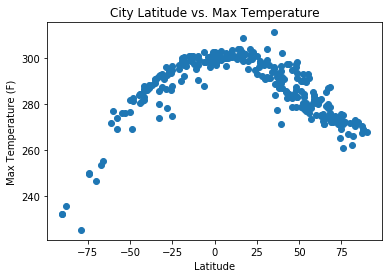

In [52]:
plt.scatter(weather_random_df["Latitude"], weather_random_df["Temperature"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Humidity (%) vs. Latitude

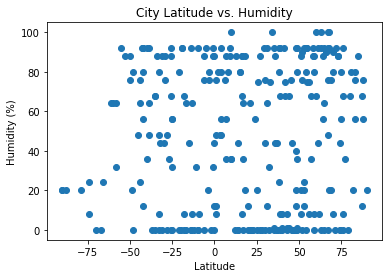

In [53]:
plt.scatter(weather_random_df["Latitude"], weather_random_df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Cloudiness (%) vs. Latitude

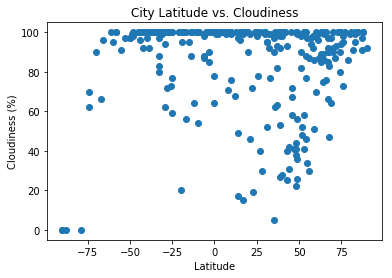

In [54]:
plt.scatter(weather_random_df["Latitude"], weather_random_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Wind Speed (mph) vs. Latitude

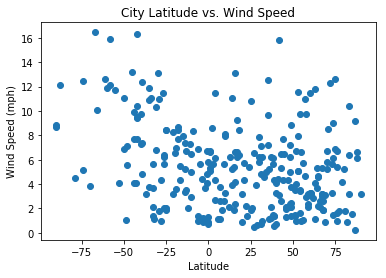

In [55]:
plt.scatter(weather_random_df["Latitude"], weather_random_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# 5 test groups by longtitude and sample 100 latitude for each test group

In [86]:
# Select five different longtitudes as a sample group
lng = []
for x in range(5):
    # Longitude values range from -180° to 180°.
    lng.append(random.randint(-180, 180))
lng

[24, 137, 99, 5, -60]

In [87]:
# 100 size samples for each sample group 
lat = []
for x in range(120):
    # Latitude values range from -90° to 90°.
    lat.append(random.randint(-90, 90))
print(lat)

[89, 22, 39, 48, 14, -56, -3, -64, 61, 27, 66, 78, -21, -10, -9, -4, 39, 79, 48, 26, -3, 43, -14, 15, 47, -78, -36, 82, 63, -17, -23, -39, 77, 23, -23, 72, 90, -37, 60, -15, 88, -11, 44, 25, -34, 87, 72, -80, -72, 73, 57, -23, 23, -86, -18, -13, 4, 69, -20, 30, -76, -86, -21, -85, -20, 62, -70, 40, -81, -52, 59, -90, -53, 90, 54, -14, -62, -52, 32, -61, 35, 30, -89, -11, -78, -35, -4, 28, -83, 78, -27, 37, 63, 28, -9, 27, -37, -2, 22, 32, 9, -52, -87, 50, 54, -5, 66, 22, -25, -33, 69, -23, 86, -25, 65, -40, 30, -65, -66, -16]


In [88]:
# Create a dataframe 
weather_df = pd.DataFrame(
{
    "City" : [],
    "Latitude" : [],
    "Longtitude" : [],
    "Temperature" : [],
    "Humidity" : [],
    "Cloudiness" : [],
    "Wind Speed" : []
})

# Make columns in order
weather_df = weather_df[["City", "Latitude", "Longtitude", "Temperature", "Humidity", "Cloudiness", "Wind Speed"]]
weather_df

,City,Latitude,Longtitude,Temperature,Humidity,Cloudiness,Wind Speed


In [89]:
# Loop through the list of cities and perform a request for data on each
index = 1

for y in lng:  
    for x in lat:
        # Set Latitude and Longtitude value on the dataframe
        weather_df.at[index, "Latitude"] = x
        weather_df.at[index, "Longtitude"] = y
                
        # Request the data
        query_url = f"{url}appid={api_key}&lat={x}&lon={y}"
        response = requests.get(query_url).json()
        
        # Retrieve the data and add it to the dataframe
        try:
            weather_df.at[index, "Temperature"] = response['main']['temp_max']
            weather_df.at[index, "Humidity"] = response['main']['humidity']
            weather_df.at[index, "Cloudiness"] = response['clouds']['all']
            weather_df.at[index, "Wind Speed"] = response['wind']['speed']
        except (KeyError, IndexError):
            weather_df.at[index, "Temperature"] = " "
            weather_df.at[index, "Humidity"] = " "
            weather_df.at[index, "Cloudiness"] = " "
            weather_df.at[index, "Wind Speed"] = " "            
        
        # Find the nearest city
        city = citipy.nearest_city(x, y)
        weather_df.loc[index, "City"] = city.city_name
        
        # Add row to the dataframe
        index += 1

print(f"Total samples : {len(weather_df)}")
weather_df.head()

Total samples : 600


,City,Latitude,Longtitude,Temperature,Humidity,Cloudiness,Wind Speed
1,longyearbyen,89.0,24.0,270.198,100.0,36.0,4.20
2,faya,22.0,24.0,298.598,24.0,0.0,3.20
3,patitirion,39.0,24.0,292.150,88.0,0.0,1.15
4,bocicoiu mare,48.0,24.0,291.150,88.0,32.0,1.00
5,kutum,14.0,24.0,298.098,22.0,0.0,4.40


In [90]:
# Delete the duplicates to have at least 500 unique (non-repeat) cities
weather_df.drop_duplicates(subset= ["City"], keep = 'first', inplace = True)
print(f"Total samples(after removing the duplicates) : {len(weather_df)}")
weather_df.head()

Total samples(after removing the duplicates) : 178


,City,Latitude,Longtitude,Temperature,Humidity,Cloudiness,Wind Speed
1,longyearbyen,89.0,24.0,270.198,100.0,36.0,4.20
2,faya,22.0,24.0,298.598,24.0,0.0,3.20
3,patitirion,39.0,24.0,292.150,88.0,0.0,1.15
4,bocicoiu mare,48.0,24.0,291.150,88.0,32.0,1.00
5,kutum,14.0,24.0,298.098,22.0,0.0,4.40


## Temperature (F) vs. Latitude

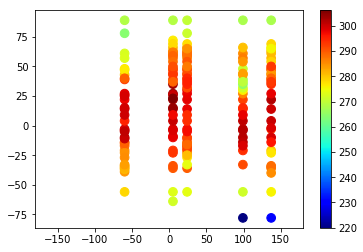

In [103]:
# x = longtitude (5 groups)
# y = latitude (100 samples)
# temperature = color

points = plt.scatter(weather_df["Longtitude"], weather_df["Latitude"],
                     c=weather_df["Temperature"], s=75, cmap="jet")
plt.colorbar(points)
plt.xlim(-180, 180)
plt.show()

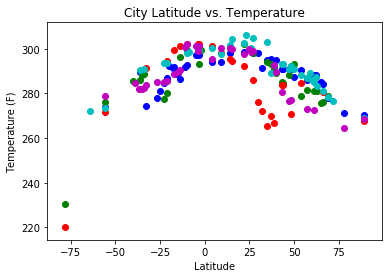

In [100]:
color = ['b', 'g', 'r', 'c', 'm']
for i in range(len(lng)):
    group = weather_df[weather_df["Longtitude"]==lng[i]]
    plt.scatter(group["Latitude"], group["Temperature"], c=color[i])
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

## Humidity (%) vs. Latitude

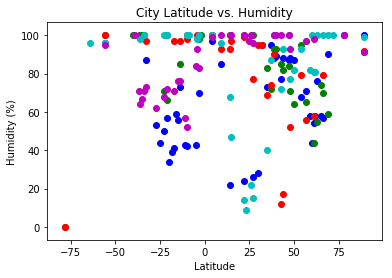

In [97]:
color = ['b', 'g', 'r', 'c', 'm']
for i in range(len(lng)):
    group = weather_df[weather_df["Longtitude"]==lng[i]]
    plt.scatter(group["Latitude"], group["Humidity"], c=color[i])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Cloudiness (%) vs. Latitude

In [106]:
# x = longtitude (5 groups)
# y = latitude (100 samples)
# cloudiness = marker size
weather = sns.load_dataset(weather_df)
sns.lmplot("Longtitude","Latitude", data = weather, hue="Temperature", size="Cloudiness")

# note. learn "plotly"


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Wind Speed (mph) vs. Latitude

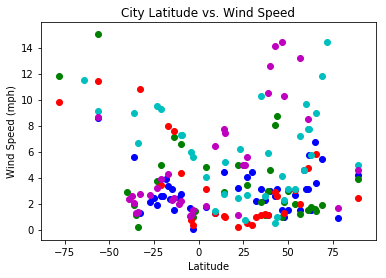

In [101]:
color = ['b', 'g', 'r', 'c', 'm']
for i in range(len(lng)):
    group = weather_df[weather_df["Longtitude"]==lng[i]]
    plt.scatter(group["Latitude"], group["Wind Speed"], c=color[i])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()